#### Linear Regression

In linear regression models, the target value is modeled as a linear combination of the features. The model is trained on a dataset with known target values. The model can then be used to predict the target value for new data points.

A complete linear regression model, up to quadratic terms, and including interaction terms, can be written as:

$$y = w_0 + w_1x_1 + w_2x_2 + +w_3x_3 + w_4x_1^2 + w_5x_2^2 + w_6x_3^2 + w_7x_1x_2 + w_8x_1x_3 + w_9x_2x_3$$

where $y$ is the target value, $x_1$, $x_2, and x_3$ are the features, and $w_0$ through $w_9$ are the model parameters.  The model parameters are determined by fitting the model to a dataset with known target values.  The model can then be used to predict the target value for new data points.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Get the data
advert = pd.read_csv('advertising.csv')
print(advert.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


The first step is to look at the data.  A reasonable first step is to plot sales vs. each of the features, individually.

Text(0, 0.5, 'Sales')

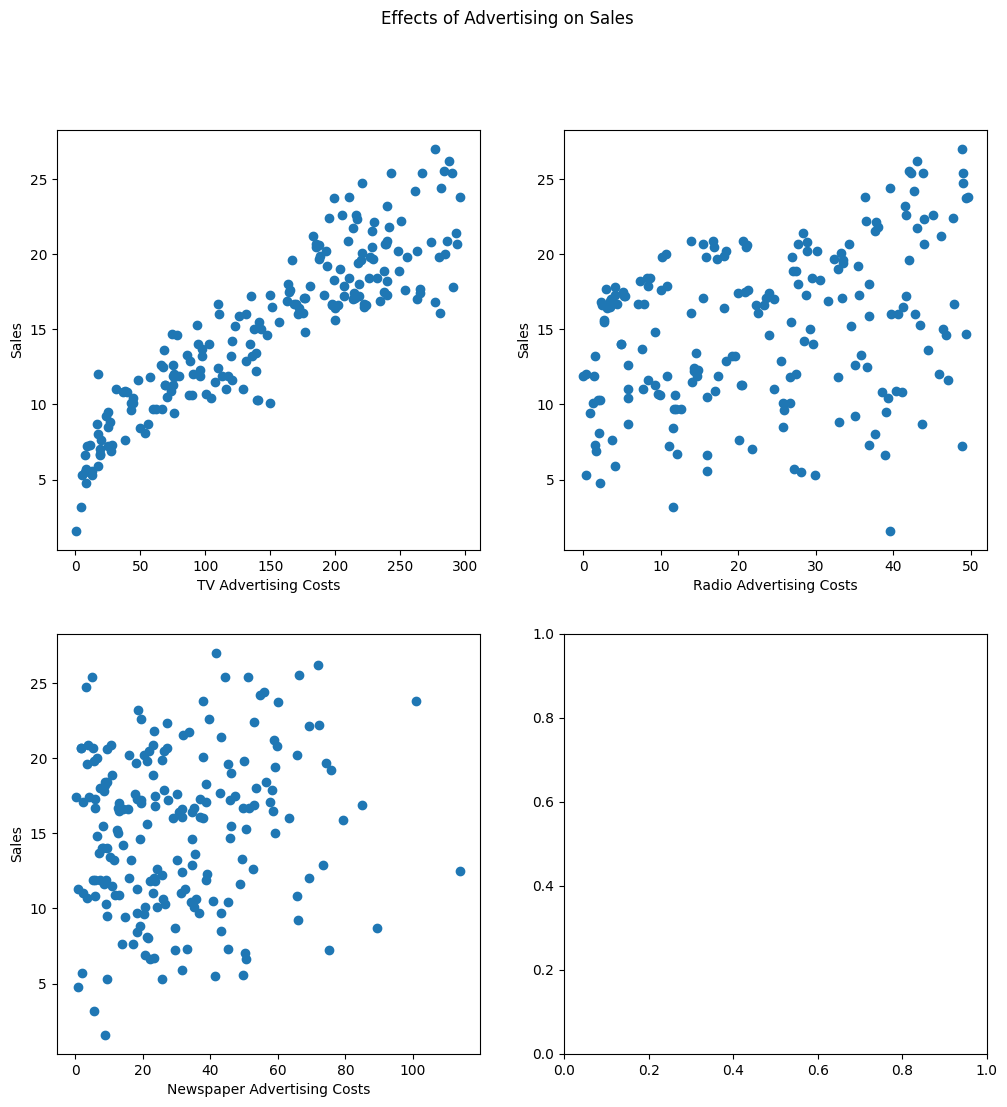

In [2]:
# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle("Effects of Advertising on Sales")
ax[0][0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][0].set_xlabel('TV Advertising Costs')
ax[0][0].set_ylabel('Sales')

ax[0][1].plot(advert['Radio'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][1].set_xlabel('Radio Advertising Costs')
ax[0][1].set_ylabel('Sales')

ax[1][0].plot(advert['Newspaper'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][0].set_xlabel('Newspaper Advertising Costs')
ax[1][0].set_ylabel('Sales')

      TV  Radio  Newspaper  Sales  Sales_Complete  Sales_Residual
0  230.1   37.8       69.2   22.1       21.763764        0.336236
1   44.5   39.3       45.1   10.4       10.384665        0.015335
2   17.2   45.9       69.3   12.0        9.079240        2.920760
3  151.5   41.3       58.5   16.5       18.383458       -1.883458
4  180.8   10.8       58.4   17.9       15.875701        2.024299
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     306.2
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          4.97e-108
Time:                        17:23:10   Log-Likelihood:                -342.10
No. Observations:                 200   AIC:                             704.2
Df Residuals:                     190   BIC:       

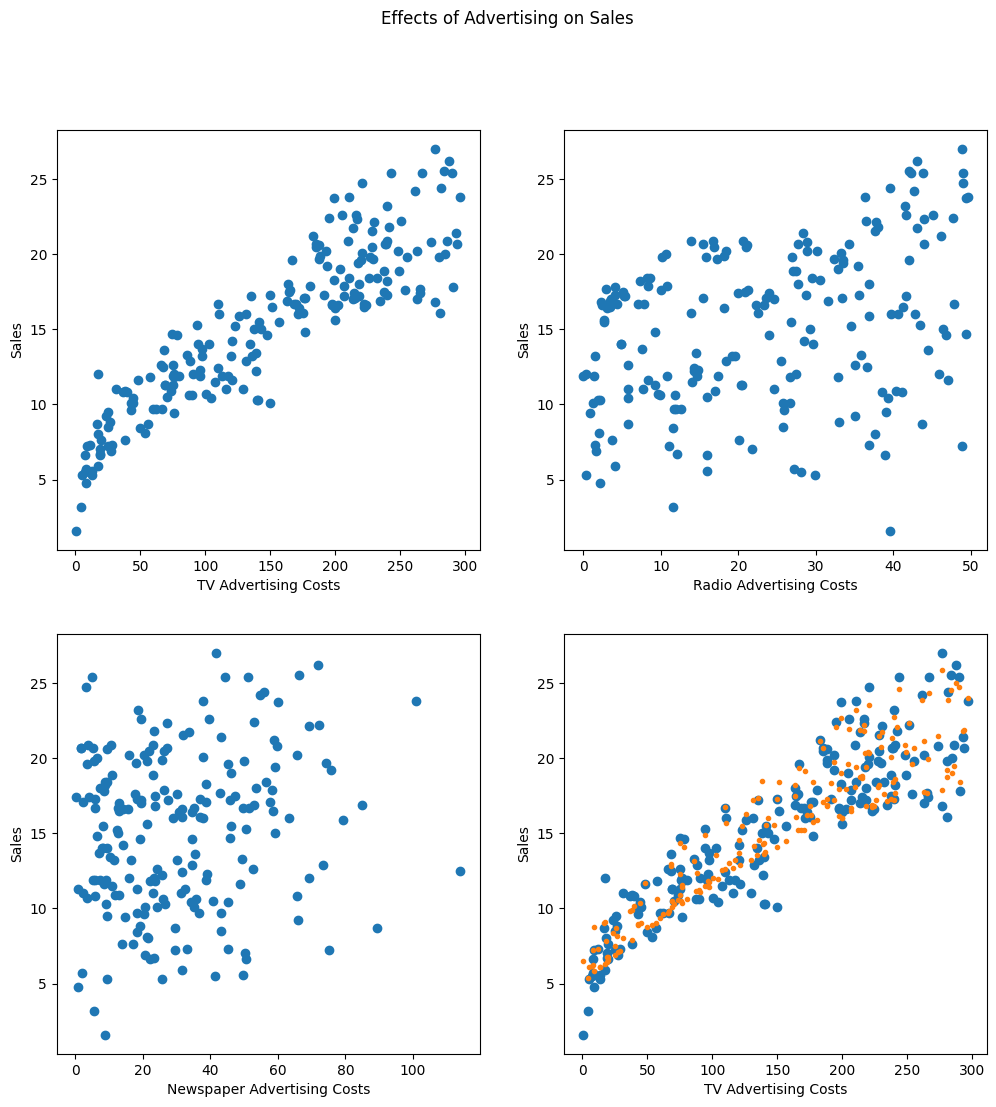

In [3]:
# Fit a linear regression model to the data
model = smf.ols('Sales ~ TV + Radio + Newspaper + np.power(TV, 2) + np.power(Radio, 2) + np.power(Newspaper, 2) + TV*Radio + TV*Newspaper + Radio*Newspaper', data=advert)
model = model.fit()

# View model summary
# print(model.summary())

# Predict values
sales_pred = model.predict()

# Add this prediction to the DataFrame
advert['Sales_Complete'] = sales_pred
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
advert['Sales_Residual'] = advert['Sales'] - sales_pred
print(advert.head())

# Plot regression against actual data
ax[1][1].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][1].plot(advert['TV'], sales_pred, '.', linewidth=2, label = "Prediction")   # regression line
ax[1][1].set_xlabel('TV Advertising Costs')
ax[1][1].set_ylabel('Sales')

print(model.summary())

fig

#### Conclusions

Looking at the P-values of the fit parameters, we see that the linear and quadratic terms for TV and Radio are significant, as is the interaction term for TV and Radio.  None of the terms associated with Newspaper are significant.  The R-squared value is 0.936, which is very good.  The F-statistic is 306, which is very large, and the associated p-value is very small, indicating that the model is significant.

Based on this, we conclude that the statistically significant terms are:

$$Sales = w_0 + w_1 \cdot TV + w_2 \cdot Radio + w_4 \cdot (TV)^2 + w_5 \cdot (Radio)^2 + w_7 \cdot TV \cdot Radio$$

Text(0.5, 1.0, 'Effects of Advertising on Sales - Residual Plot')

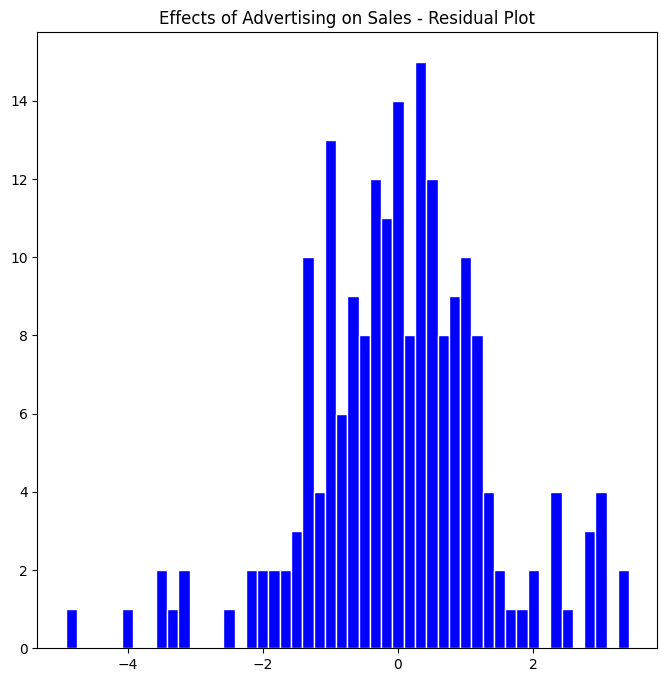

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.hist(advert['Sales_Residual'], color = "blue", ec="white", bins=50, label='Sales Residuals')
ax.set_title("Effects of Advertising on Sales - Residual Plot")

In [5]:
print(advert['Sales_Residual'].describe())

count    2.000000e+02
mean     6.333778e-13
std      1.341886e+00
min     -4.922012e+00
25%     -7.703587e-01
50%      2.282547e-02
75%      8.061922e-01
max      3.424282e+00
Name: Sales_Residual, dtype: float64


### Question:  Can we understand the interaction between TV and Radio advertising?

Let's begin by looking at the correlation between TV and Radio advertising costs, as presented in the data.

Text(0, 0.5, 'Newspaper Advertising Costs')

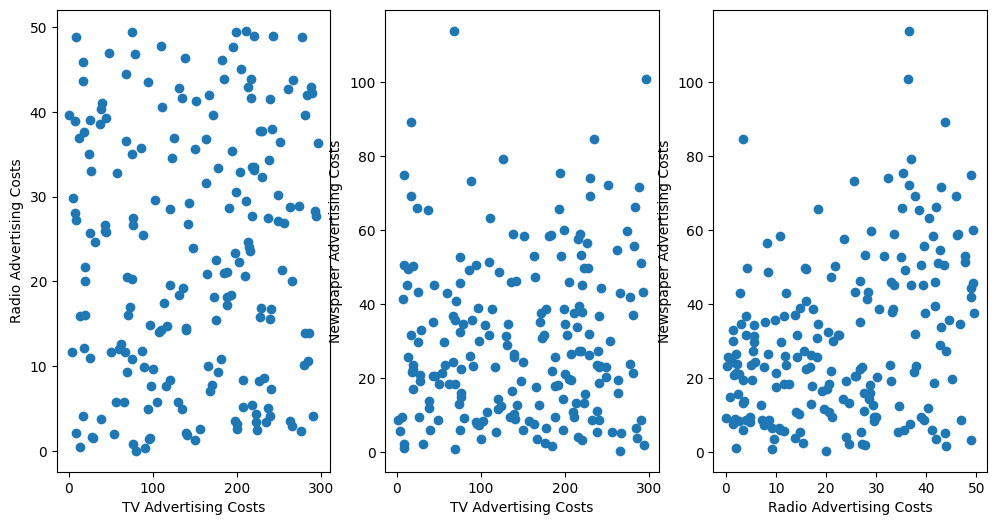

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))

ax[0].plot(advert['TV'], advert['Radio'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].set_xlabel('TV Advertising Costs')
ax[0].set_ylabel('Radio Advertising Costs')

ax[1].plot(advert['TV'], advert['Newspaper'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].set_xlabel('TV Advertising Costs')
ax[1].set_ylabel('Newspaper Advertising Costs')

ax[2].plot(advert['Radio'], advert['Newspaper'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].set_xlabel('Radio Advertising Costs')
ax[2].set_ylabel('Newspaper Advertising Costs')


      TV  Radio  Newspaper  Sales  Sales_Complete  Sales_Residual
0  230.1   37.8       69.2   22.1       21.690581        0.409419
1   44.5   39.3       45.1   10.4       10.925825       -0.525825
2   17.2   45.9       69.3   12.0        8.826359        3.173641
3  151.5   41.3       58.5   16.5       18.303228       -1.803228
4  180.8   10.8       58.4   17.9       15.558696        2.341304
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     317.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          1.95e-109
Time:                        17:23:17   Log-Likelihood:                -338.69
No. Observations:                 200   AIC:                             697.4
Df Residuals:                     190   BIC:       

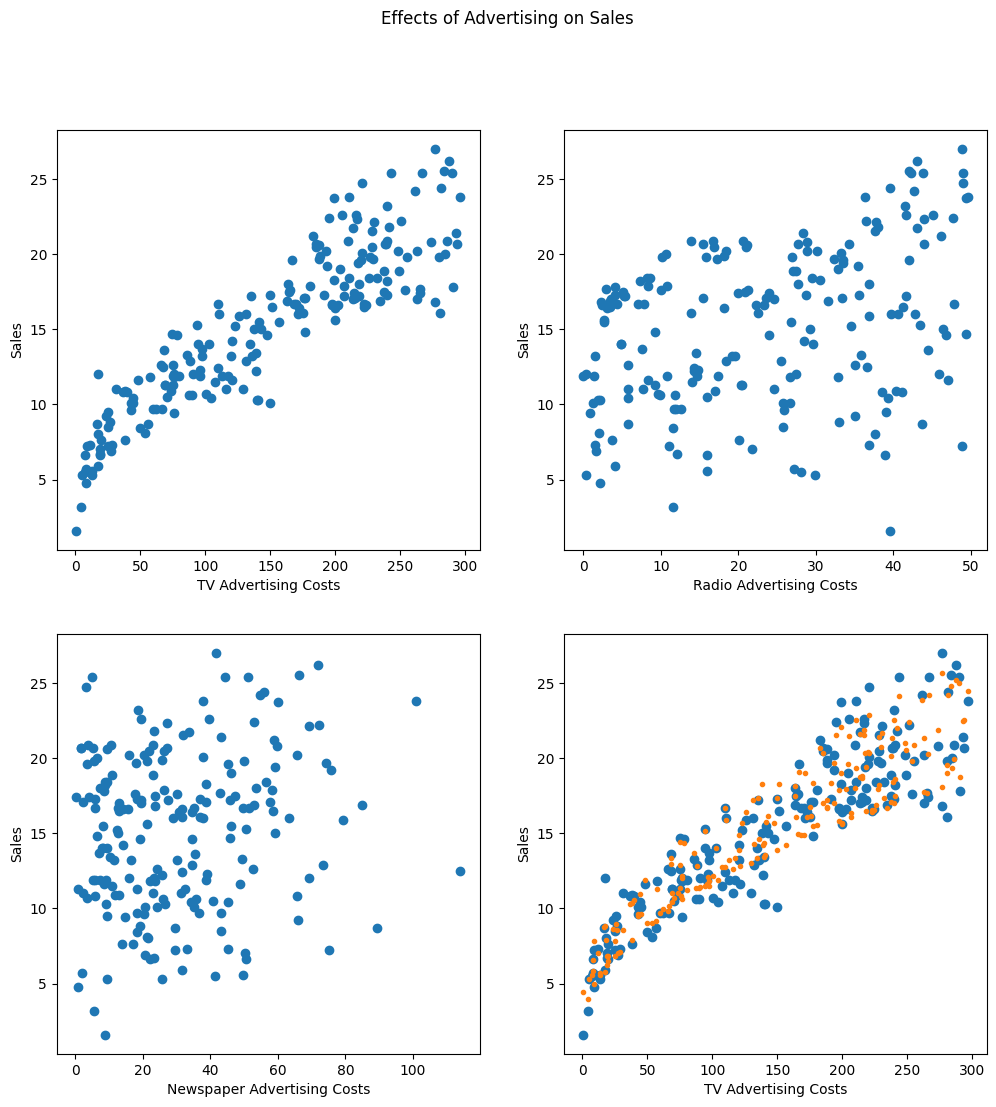

In [7]:
# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle("Effects of Advertising on Sales")
ax[0][0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][0].set_xlabel('TV Advertising Costs')
ax[0][0].set_ylabel('Sales')

ax[0][1].plot(advert['Radio'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][1].set_xlabel('Radio Advertising Costs')
ax[0][1].set_ylabel('Sales')

ax[1][0].plot(advert['Newspaper'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][0].set_xlabel('Newspaper Advertising Costs')
ax[1][0].set_ylabel('Sales')

# Fit a linear regression model to the data
model = smf.ols('Sales ~ TV + Radio + Newspaper + np.power(TV, 0.5) + np.power(Radio, 0.5) + np.power(Newspaper,0.5) + TV*Radio + TV*Newspaper + Radio*Newspaper', data=advert)
model = model.fit()

# View model summary
# print(model.summary())

# Predict values
sales_pred = model.predict()

# Add this prediction to the DataFrame
advert['Sales_Complete'] = sales_pred
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
advert['Sales_Residual'] = advert['Sales'] - sales_pred
print(advert.head())

# Plot regression against actual data
ax[1][1].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][1].plot(advert['TV'], sales_pred, '.', linewidth=2, label = "Prediction")   # regression line
ax[1][1].set_xlabel('TV Advertising Costs')
ax[1][1].set_ylabel('Sales')

print(model.summary())



count    2.000000e+02
mean     7.617462e-14
std      1.319170e+00
min     -3.750856e+00
25%     -7.809640e-01
50%      6.527027e-03
75%      6.487572e-01
max      3.488901e+00
Name: Sales_Residual, dtype: float64


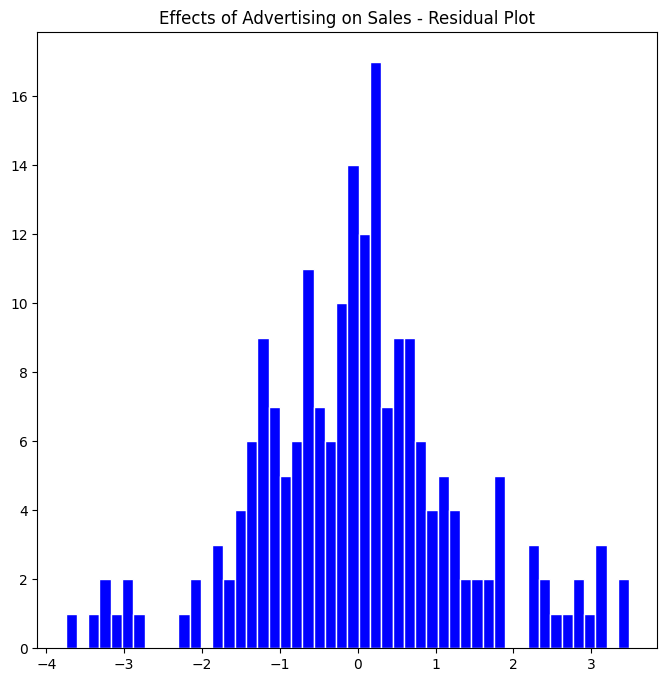

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.hist(advert['Sales_Residual'], color = "blue", ec="white", bins=50, label='Sales Residuals')
ax.set_title("Effects of Advertising on Sales - Residual Plot")

print(advert['Sales_Residual'].describe())

#### Conclusions

Looking at the P-values of the fit parameters, we see that now only the linear term for Radio is significant, as is the interaction term for TV and Radio, but the terms related to the square root of TV and Radio are both significant.  None of the terms associated with Newspaper are significant.  The R-squared value is 0.938, which is very good.  The F-statistic is 318, which is very large, and the associated p-value is very small, indicating that the model is significant.

Based on this, we conclude that the statistically significant terms are:

$$Sales = w_0 + w_2 \cdot Radio + w_4 \cdot \sqrt{TV} + w_5 \cdot \sqrt{Radio} + w_7 \cdot TV \cdot Radio$$

The fact that we are able to achieve a similar R-squared value with a simpler model (i.e. five parameters vs. six) is a good indication that this model is better than the previous one!!!

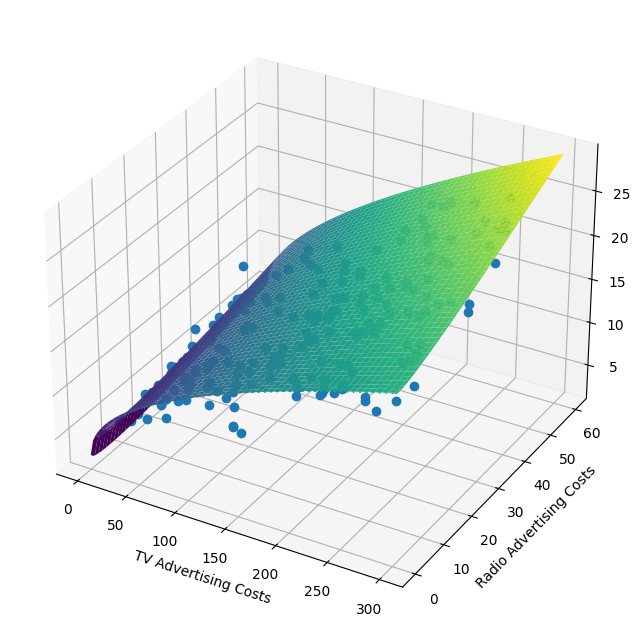

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the x, y, and z coordinate arrays
x = np.linspace(0, 300, 100)
y = np.linspace(0, 60, 100)
x, y = np.meshgrid(x, y)

w0 = model.params[0]
w2 = model.params[2]
w4 = model.params[4]
w5 = model.params[5]
w7 = model.params[7]

z = w0 + w2*y + w4*np.sqrt(x) + w5*np.sqrt(y) + w7*x*y

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(advert['TV'], advert['Radio'], advert['Sales'], 'o', label = "Data")
ax.plot_surface(x, y, z, cmap='viridis')


ax.set_xlabel('TV Advertising Costs')
ax.set_ylabel('Radio Advertising Costs')
ax.set_zlabel('Sales')

plt.show()
